### This session in used to let you know how to use geopandas for spatial data processing

The pandas library has made data manipulation and analysis far easier in Python. But what happens when you need to analyse and manipulate geospatial data? This tutorial will walk you through the use of GeoPandas to manipulate spatial data and do spatial analsis.

The geopandas wraps serveral other open source modules, pandas, fiona, and shapely. It makes  spatial data manipulations much easier, although it has its own capability and it is not as flexible as the fiona and shapely. It is good to start with geopandas if you are not quite familar with using open source tools for spatial analysis. Before this session, you need to have GeoPandas installed on your computer. Here, I suggest to use anaconda to configure the environment and install Python modules (http://geopandas.org/install.html#installing-geopandas). 

In this session, you will learn:
1.  Using GeoPandas to read shapefiles
1.  Projection manipulation
1.  Spatial join of different shapefiles
1.  Create maps using GeoPandas


In [ ]:
!pip install descartes
!pip install mapclassify

Read the shapefile of traffic accident data in Philadelphia

In [49]:
import geopandas as gpd

# geopandas will read the shapefile into a data frame with the geometric information
accident = gpd.read_file("../../data/crash_data_collision_crash_2007_2017.shp")


Get the coordinate reference system (CRS) information

In [50]:
accident.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Read the census tract shapefile

In [51]:
censusMap = gpd.read_file("../../data/census-tract-data.shp")

censusMap.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

### Reproject shapefile into a new projection
In order to do spatial join of the traffic accident and the census tract data, we need to make sure different shapefiles are in the same projection.

In [52]:
accident_reprojected = accident.to_crs('EPSG:4269')

accident_reprojected.head()

,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
0,None,9498,128198,2016019772,6,67,67301,2016,2,2,...,1,0,0,3,0,40.0628,-75.0577,None,None,POINT (-75.05770 40.06280)
1,None,9570,128432,2016013724,6,67,67301,2016,1,3,...,0,0,0,3,0,40.0822,-74.9669,None,None,POINT (-74.96690 40.08220)
2,None,9642,128688,2016038282,6,67,67301,2016,3,5,...,0,0,0,0,1,39.9751,-75.1946,None,None,POINT (-75.19460 39.97510)
3,None,9714,128842,2016052220,6,67,67301,2016,2,5,...,0,0,0,8,0,40.0357,-75.2171,None,None,POINT (-75.21710 40.03570)
4,None,9786,128975,2016087187,6,67,67301,2016,8,6,...,1,0,0,4,0,39.9511,-75.1721,None,None,POINT (-75.17210 39.95110)


### Filter out some records
Let just extract the traffic accident records in 2015

In [53]:
accident_2015 = accident_reprojected.loc[accident_reprojected['crash_year'] == 2015] #locate the traffic accident in 2015
accident_2015.head()


,county_nam,objectid_1,objectid,crn,district,county,municipali,crash_year,crash_mont,day_of_wee,...,ped_count,ped_death_,ped_maj_in,max_severi,comm_veh_c,dec_lat,dec_long,rdwy_surf_,wz_law_off,geometry
22660,None,22661,274853,2015028828,6,67,67301,2015,2,1,...,0,0,0,4,0,39.9765,-75.1894,None,None,POINT (-75.18940 39.97650)
22661,None,22662,274856,2015030569,6,67,67301,2015,2,4,...,0,0,0,4,0,40.0371,-75.1657,None,None,POINT (-75.16570 40.03710)
22662,None,22663,274862,2015038631,6,67,67301,2015,3,5,...,0,0,0,4,0,40.0275,-75.0800,None,None,POINT (-75.08000 40.02750)
22663,None,22664,274891,2015025058,6,67,67301,2015,2,3,...,0,0,0,4,0,39.9238,-75.2397,None,None,POINT (-75.23970 39.92380)
22664,None,22665,274898,2015033754,6,67,67301,2015,2,7,...,0,0,0,8,0,40.0719,-75.0296,None,None,POINT (-75.02960 40.07190)


### Plot the traffic accident map

<AxesSubplot:>

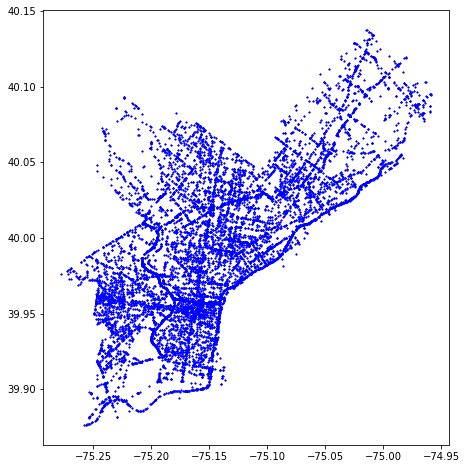

<Figure size 720x720 with 0 Axes>

In [56]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))
accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=2)

In [ ]:
nb_df_mass.plot(ax=ax3, color='white', edgecolor='black')


### Map the point map with the basemap of the census tract

<AxesSubplot:>

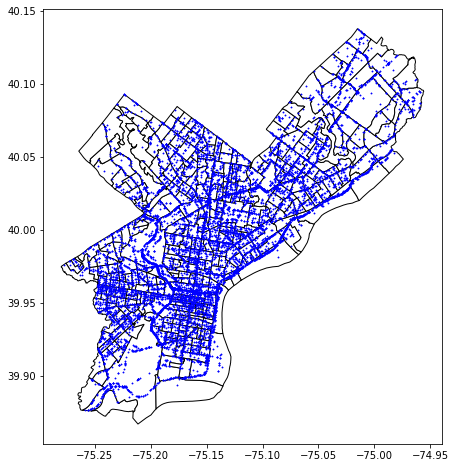

<Figure size 720x720 with 0 Axes>

In [62]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, figsize=(8, 8))

plt.figure(figsize=(10, 10))

censusMap.plot(ax=ax, color='white', edgecolor='black')

accident_2015.plot(marker='*', 
                   ax=ax, 
                   color='blue', 
                   markersize=1)

### Spatial Join
The map doesn't give a clear spatial pattern of the the traffic accidents. We can first aggregate the point to census tract and create a choropleth map.

In [63]:
joined = gpd.sjoin(accident_2015, censusMap, how='left', op='intersects')
print(joined.head())

      county_nam  objectid_1  objectid         crn  district  county_left  \
22660       None       22661    274853  2015028828         6           67   
22661       None       22662    274856  2015030569         6           67   
22662       None       22663    274862  2015038631         6           67   
22663       None       22664    274891  2015025058         6           67   
22664       None       22665    274898  2015033754         6           67   

       municipali  crash_year  crash_mont  day_of_wee  ...  male85_  \
22660       67301        2015           2           1  ...        0   
22661       67301        2015           2           4  ...       23   
22662       67301        2015           3           5  ...        0   
22663       67301        2015           2           3  ...        0   
22664       67301        2015           2           7  ...        6   

       fema_65_66  fema_67_69  fema70_74  fema75_79  fema80_84  fema85_ state  \
22660           3           0

### Group by tract
Count the number of traffic accidents in each census tract

In [64]:
results = joined.groupby('tract').size().to_frame('size')
print(results)


        size
tract       
000100    75
000200    44
000300    97
000401    27
000402    49
...      ...
980600    17
980700   137
980800    13
980900   395
989100    75

[383 rows x 1 columns]


### Merge the stand alone table with the shapefile

The spatial joined table is a table not a shapefile. In order to create a map, we need to assign coordinate information to the traffic accident data by census tract. We can use `Merge` to create a shapefile with the traffic accident informaiton. 

In [66]:
import pandas as pd

## Merge the accident data to the shapefile
trafficAccident = pd.merge(censusMap, results, on="tract")

# trafficAccident.head()

<AxesSubplot:>

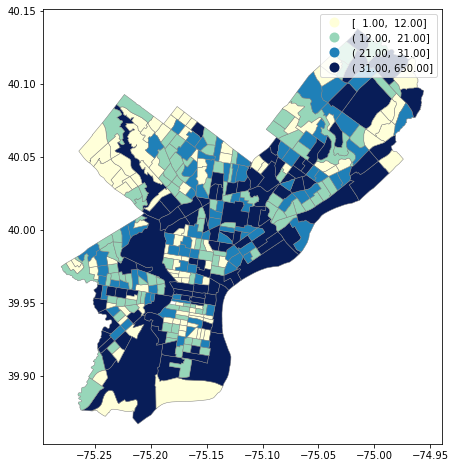

In [68]:
import mapclassify as mc

# create a empty plot for the choropleth map
fig, ax = plt.subplots(1, figsize=(8, 8))

trafficAccident.plot(column='size', 
                         cmap='YlGnBu', 
                         edgecolor='0.5',
                         ax = ax,
                         linewidth=0.5,
                         legend=True,
                         k=4, #the number of classes
                         scheme='quantiles') # 'equal_interval', 'quantiles', 'FisherJenks', 'NaturalBreaks'


Save the new geopandas dataframe to a shapefile

In [48]:
trafficAccident.to_file("trafficAccidentByCensusTract.shp")


### Reference:

1. GeoPandas tutorial: http://geopandas.org/index.html
2. AutoGIS Document: https://automating-gis-processes.github.io/2016/Lesson2-geopandas-basics.html
3. Python Foundation for Spatial Analysis, https://courses.spatialthoughts.com/python-foundation.html